In [58]:
# -*- coding: utf-8 -*-
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')  #ignore warning msg

#Pandas Config.
#For the default setting: reset_option(param) 
pd.set_option("display.max_rows", 100)  #출력할 행의 수
pd.set_option('display.max_columns', None)  #출력할 열의 수; None for the entire columns
pd.set_option('display.max_colwidth', 1000)  #열의 너비; None for the entire columns
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Format scientific notation from Pandas

%matplotlib inline

In [24]:
path = "../data/raw/"
data = pd.read_csv(path + "train.csv")

In [25]:
print(data.shape)

(1460, 81)


In [26]:
data.columns = [i.lower() for i in data.columns]

In [27]:
data.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Handle Outliers 

In [12]:
data["saleprice"].describe(percentiles=np.arange(0.05, 1, 0.05))

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
15%     115000.000
20%     124000.000
25%     129975.000
30%     135500.000
35%     141000.000
40%     147000.000
45%     155000.000
50%     163000.000
55%     172500.000
60%     179280.000
65%     187500.000
70%     198620.000
75%     214000.000
80%     230000.000
85%     250000.000
90%     278000.000
95%     326100.000
max     755000.000
Name: saleprice, dtype: float64

In [33]:
# IQR method to handle outliers
Q1 = data["saleprice"].quantile(0.25)
Q3 = data["saleprice"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR


new_data = data[~((data["saleprice"] < (lower_thresh)) |(data["saleprice"] > (upper_thresh)))]
print(data.shape, new_data.shape)


(1460, 81) (1399, 81)


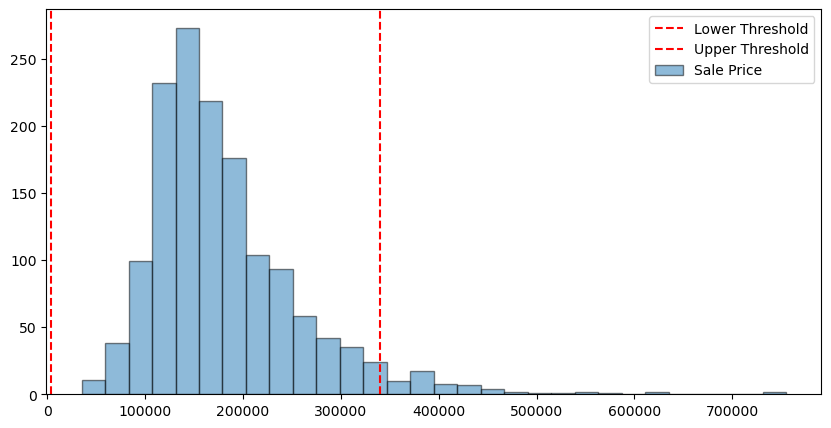

In [37]:
plt.figure(figsize=(10, 5))

plt.hist(data["saleprice"], bins=30, edgecolor='black', alpha=0.5)
plt.axvline(x=lower_thresh, color='r', linestyle='--')
plt.axvline(x=upper_thresh, color='r', linestyle='--')
plt.legend(['Lower Threshold', 'Upper Threshold', 'Sale Price'])

plt.show()

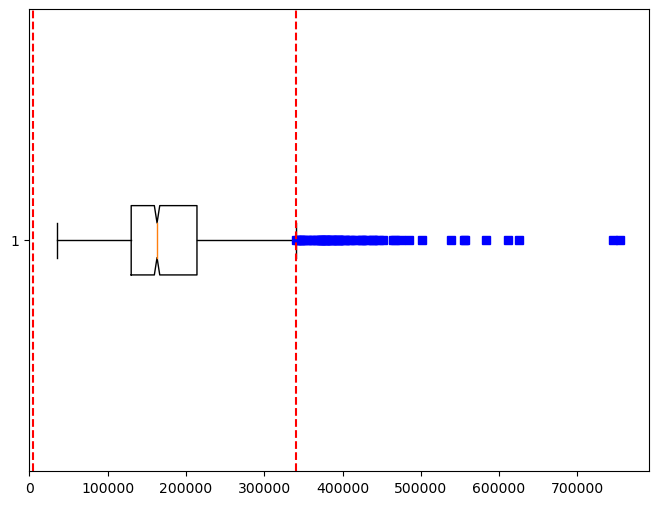

In [44]:
plt.figure(figsize=(8, 6))

plt.boxplot(data["saleprice"],            
            notch=1, # if 'True' then notched box plot
            sym='bs', # symbol: red square
            vert=0, # vertical box aligmnent
            )

plt.axvline(x=lower_thresh, color='r', linestyle='--')
plt.axvline(x=upper_thresh, color='r', linestyle='--')

plt.show()


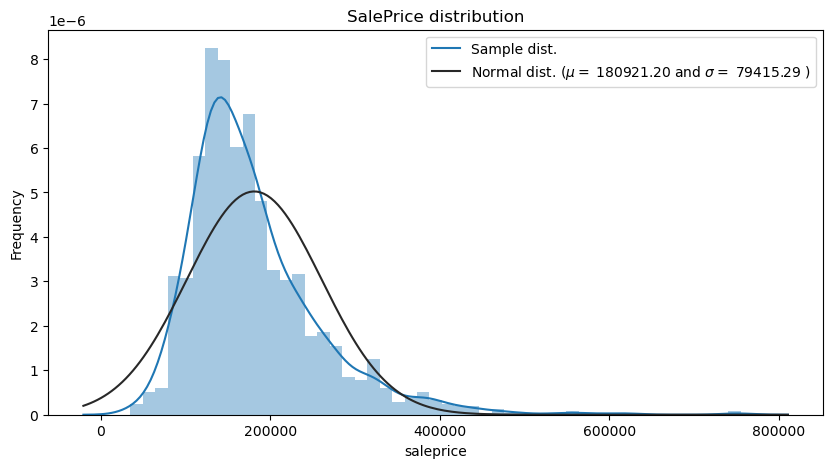

In [62]:
plt.figure(figsize=(10, 5))

(mu, sigma) = norm.fit(data['saleprice'])

sns.distplot(data['saleprice'] , fit=norm)
plt.legend(['Sample dist.', 'Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()



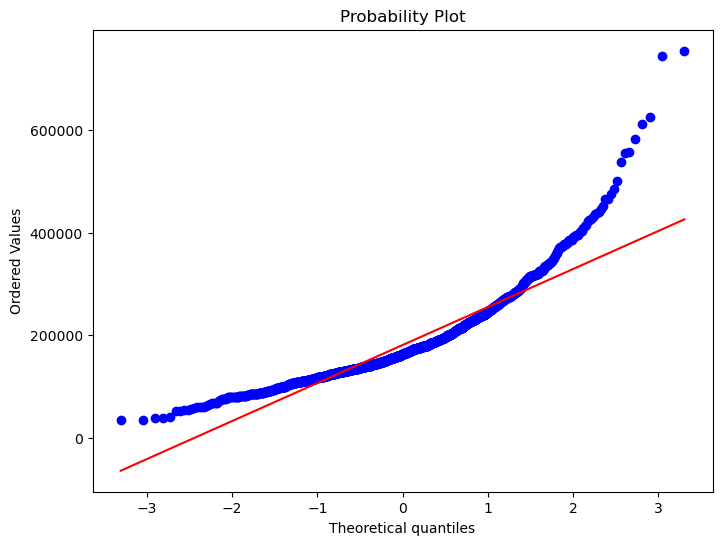

In [59]:
plt.figure(figsize=(8, 6))

stats.probplot(data["saleprice"], plot=plt)

plt.show()

- Sample values are starting at certain level around 30k and there seems to be right-skewed.
- If we're going to implement linear models, we need to transform the variable into more normally distributed one.